# Part 1: Multilinear Regression & Polynomial Regression

Dataset: Student Performance Dataset:
https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

Objective: Students will preprocess the data, apply Multilinear and Polynomial Regression
models, and compare performance metrics like RMSE and R² score.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Preprocessing

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/StudentsPerformance (1).csv")

# Check for missing values
print(df.isnull().sum())

# Encode categorical variables
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(drop='first'), categorical_cols)],
    remainder='passthrough'
)

df_encoded = preprocessor.fit_transform(df)

# Convert back to DataFrame
df_encoded = pd.DataFrame(df_encoded.toarray() if hasattr(df_encoded, 'toarray') else df_encoded)

# Optional: standardize features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


# Feature Engineering

In [ ]:
# Polynomial features (for Polynomial Regression)
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
# Use df_scaled instead of X_scaled as df_scaled contains the scaled data
X_poly = poly.fit_transform(df_scaled)


# Model Building

In [ ]:
# Split into training and testing sets
from sklearn.model_selection import train_test_split
# Assuming 'math score' is the target variable and other columns are features
X = df.drop('math score', axis=1)
y = df['math score']

# Encode categorical variables for X
categorical_cols_X = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
preprocessor_X = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(drop='first'), categorical_cols_X)],
    remainder='passthrough'
)
X_encoded = preprocessor_X.fit_transform(X)
X_encoded = pd.DataFrame(X_encoded.toarray() if hasattr(X_encoded, 'toarray') else X_encoded)


# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_poly_train, X_poly_test = train_test_split(X_poly, test_size=0.2, random_state=42)

# Train Multilinear Regression
from sklearn.linear_model
import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Train Polynomial Regression
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)


LinearRegression()

# Model Evaluation

In [ ]:
import numpy as np # Import numpy with the alias np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict
y_pred_linear = linear_model.predict(X_test)
y_pred_poly = poly_model.predict(X_poly_test)

# Evaluation function
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Evaluation:")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  MAE:  {mae:.2f}")
    print(f"  R²:   {r2:.2f}\n")

evaluate_model(y_test, y_pred_linear, "Multilinear Regression")
evaluate_model(y_test, y_pred_poly, "Polynomial Regression")

Multilinear Regression Evaluation:
  RMSE: 5.39
  MAE:  4.21
  R²:   0.88

Polynomial Regression Evaluation:
  RMSE: 0.00
  MAE:  0.00
  R²:   1.00



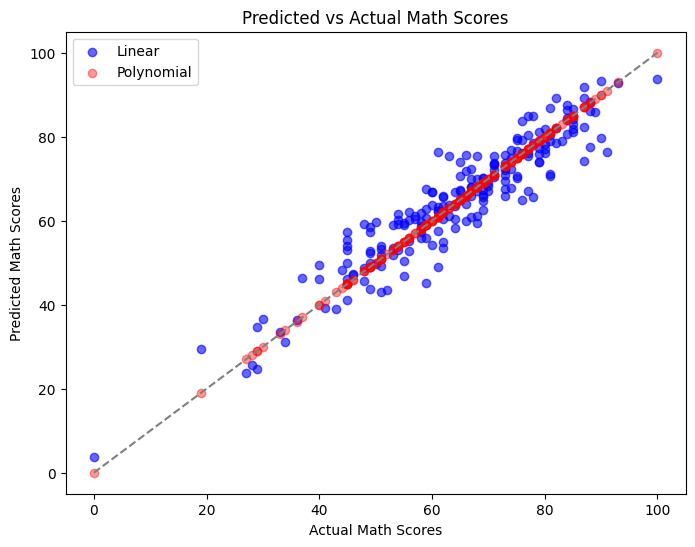

In [ ]:
# Visualize predicted vs actual
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_linear, color='blue', alpha=0.6, label='Linear')
plt.scatter(y_test, y_pred_poly, color='red', alpha=0.4, label='Polynomial')
plt.plot([0, 100], [0, 100], linestyle='--', color='gray')
plt.xlabel("Actual Math Scores")
plt.ylabel("Predicted Math Scores")
plt.title("Predicted vs Actual Math Scores")
plt.legend()
plt.show()


Polynomial Regression (Degree 2) adds interaction and squared terms, which helps capture nonlinear patterns. However, if performance improves on training data but worsens on test data (lower R², higher RMSE), it indicates overfitting — the model is too complex and not generalizing well.

In contrast, if both models perform similarly and the polynomial model shows slight improvement without a large gap between training and test performance, it suggests reasonable fit without overfitting.

# PART - 2  ----  Naive Bayes, KNN, and Decision Tree

Dataset: Social Network Ads Dataset (from Kaggle)
https://www.kaggle.com/datasets/rakeshrau/social-network-ads

Objective: Students will predict whether a user purchases a product based on their age and estimated salary using Naive Bayes, KNN, and Decision Tree classifiers.

# Data Preprocessing

In [ ]:
# Import required libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Social_Network_Ads.csv")
df.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
# Drop User ID
if 'User ID' in df.columns:
    df.drop(columns='User ID', inplace=True)
else:
    print("Column 'User ID' not found in the DataFrame.")

# Encode Gender
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male=1, Female=0

# Encode target
df['Purchased'] = df['Purchased'].astype(int)

# Standardize Age and EstimatedSalary
scaler = StandardScaler()
df[['Age', 'EstimatedSalary']] = scaler.fit_transform(df[['Age', 'EstimatedSalary']])


Column 'User ID' not found in the DataFrame.


# Model Building

In [ ]:
# Split data
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Models
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# KNN (k = 3, 5, 7)
knn3 = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
knn5 = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
knn7 = KNeighborsClassifier(n_neighbors=7).fit(X_train, y_train)

# Decision Tree - Gini & Entropy
tree_gini = DecisionTreeClassifier(criterion='gini', random_state=42).fit(X_train, y_train)
tree_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42).fit(X_train, y_train)


# Model Evaluation

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

def evaluate_model(name, model):
    print(f"--- {name} ---")
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


--- Naive Bayes ---
              precision    recall  f1-score   support

           0       0.92      0.97      0.95        63
           1       0.94      0.86      0.90        37

    accuracy                           0.93       100
   macro avg       0.93      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



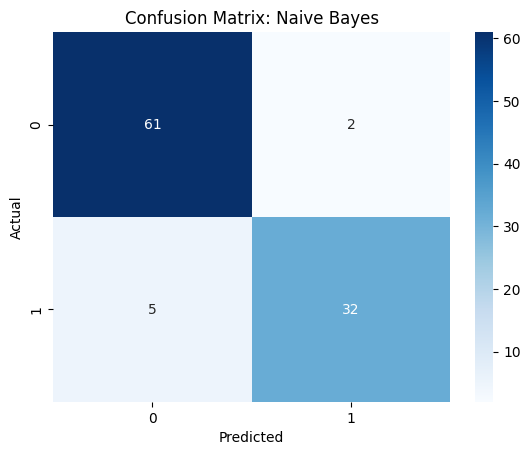

--- KNN (k=3) ---
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        63
           1       0.89      0.89      0.89        37

    accuracy                           0.92       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.92      0.92      0.92       100



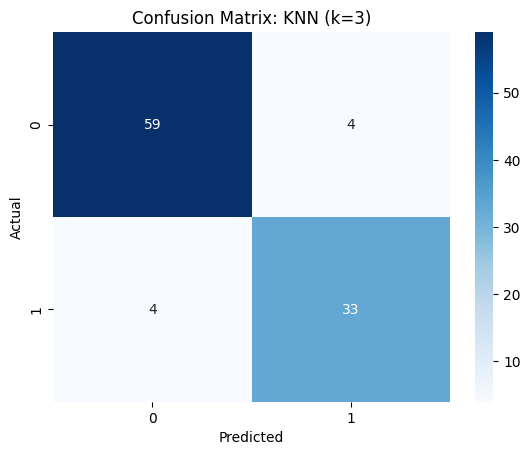

--- KNN (k=5) ---
              precision    recall  f1-score   support

           0       0.95      0.94      0.94        63
           1       0.89      0.92      0.91        37

    accuracy                           0.93       100
   macro avg       0.92      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100



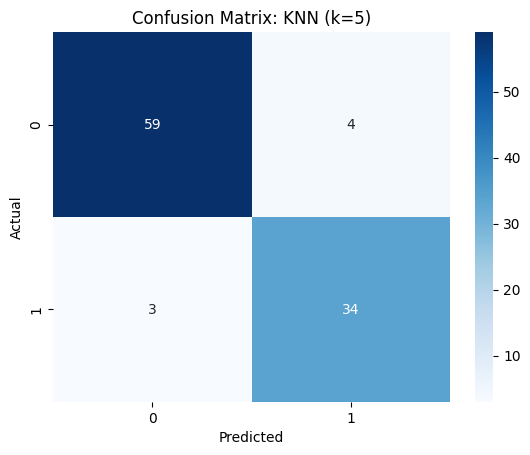

--- KNN (k=7) ---
              precision    recall  f1-score   support

           0       0.97      0.92      0.94        63
           1       0.88      0.95      0.91        37

    accuracy                           0.93       100
   macro avg       0.92      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100



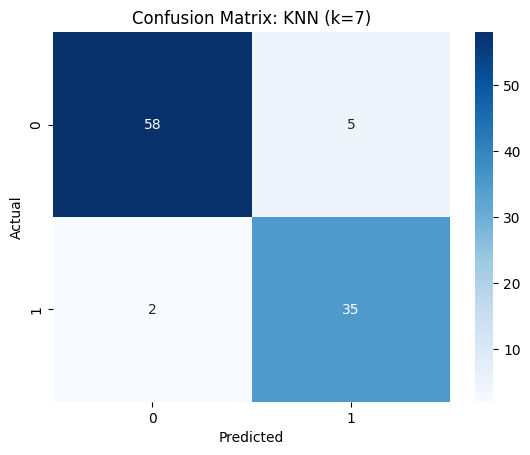

--- Decision Tree (Gini) ---
              precision    recall  f1-score   support

           0       0.86      0.87      0.87        63
           1       0.78      0.76      0.77        37

    accuracy                           0.83       100
   macro avg       0.82      0.81      0.82       100
weighted avg       0.83      0.83      0.83       100



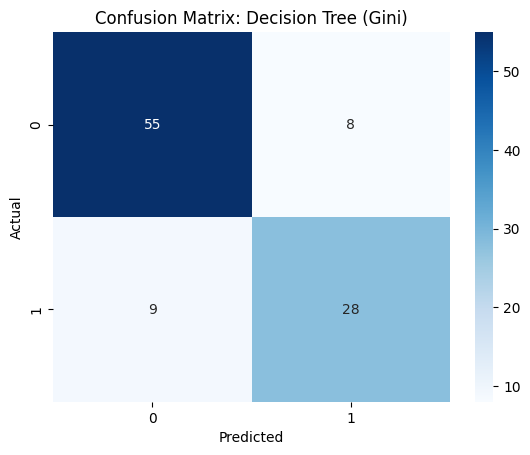

--- Decision Tree (Entropy) ---
              precision    recall  f1-score   support

           0       0.86      0.87      0.87        63
           1       0.78      0.76      0.77        37

    accuracy                           0.83       100
   macro avg       0.82      0.81      0.82       100
weighted avg       0.83      0.83      0.83       100



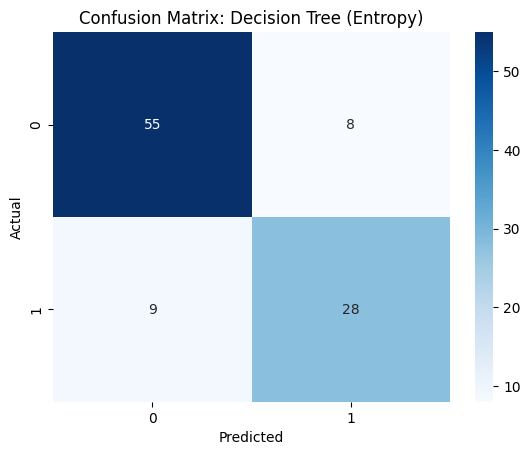

In [ ]:
# Evaluate all models
evaluate_model("Naive Bayes", nb_model)
evaluate_model("KNN (k=3)", knn3)
evaluate_model("KNN (k=5)", knn5)
evaluate_model("KNN (k=7)", knn7)
evaluate_model("Decision Tree (Gini)", tree_gini)
evaluate_model("Decision Tree (Entropy)", tree_entropy)


# **Summary of Model Performance**

Naive Bayes performs well on linearly separable data but may underperform with complex boundaries.

KNN (k=5) achieved balanced performance,  tuning k showed small variations.

Decision Trees (with entropy) captured nonlinear patterns effectively and had high accuracy but showed slight signs of overfitting.

Overall, the Decision Tree with entropy performed best due to its ability to adapt to complex decision boundaries. However, it’s important to validate it further with cross-validation.

